<a href="https://colab.research.google.com/github/GeorgeTelles/sharpe_sortino_ratio/blob/main/Sharpe_Sortino_Ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Sharpe e Sortino Ratios**

#### C√°lculo e compara√ß√£o entre as duas importantes m√©tricas de risco: Sharpe e Sortino
---


Antes de selecionar um ativo financeiro, os investidores devem buscar o retorno ajustado ao risco e n√£o apenas o retorno simples. Diante disso surge uma d√∫vida, qual indice utilizar para medir esse retorno ajustado ao risco? o Indice Sharpe ou o Indice Sortino? ser√° que eles s√£o relacionados? S√£o essas quest√µes que vamos analisar aqui.



---







O √≠ndice de Sharpe e o √≠ndice de Sortino s√£o m√©tricas de retorno sobre o investimento ajustadas ao risco. O √≠ndice de Sharpe indica o desempenho de um investimento em compara√ß√£o com um investimento sem risco, levando em considera√ß√£o o n√≠vel de risco adicional envolvido em manter o investimento em a√ß√µes. O √≠ndice Sortino √© uma varia√ß√£o do √≠ndice Sharpe que considera apenas o risco negativo.



---



$\textbf{Sharpe ratio} = \frac{R{p}-R{f}}{{\sigma {p}}}$

where:<br>
$R{p}$ = return of portfolio (or stock)<br>
$R{f}$ = risk-free rate<br>
$\sigma {p}$ = standard deviation of returns<br>


$\textbf{Sortino ratio} = \frac{R{p}-R{f}}{{\sigma {p}}}$

where:<br>
$R{p}$ = return of portfolio (or stock)<br>
$R{f}$ = risk-free rate<br>
$\sigma {p}$ = standard deviation of the negative returns<br>

# 1. Instala√ß√£o e importa√ß√£o das bibliotecas

In [1]:
!pip install quantstats
!pip install yfinance

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 45.5/45.5 kB 573.0 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 2. Obten√ß√£o de dados

Inicialmente, vamos observar como os dois √≠ndices est√£o correlacionados

Obter dados de BTC-USD

In [3]:
df_btc = yf.download('BTC-USD', start = '2018-01-01')[['Close']]

[*********************100%%**********************]  1 of 1 completed


In [4]:
df_btc.head()

Close
Date                    
2018-01-01  13657.200195
2018-01-02  14982.099609
2018-01-03  15201.000000
2018-01-04  15599.200195
2018-01-05  17429.500000

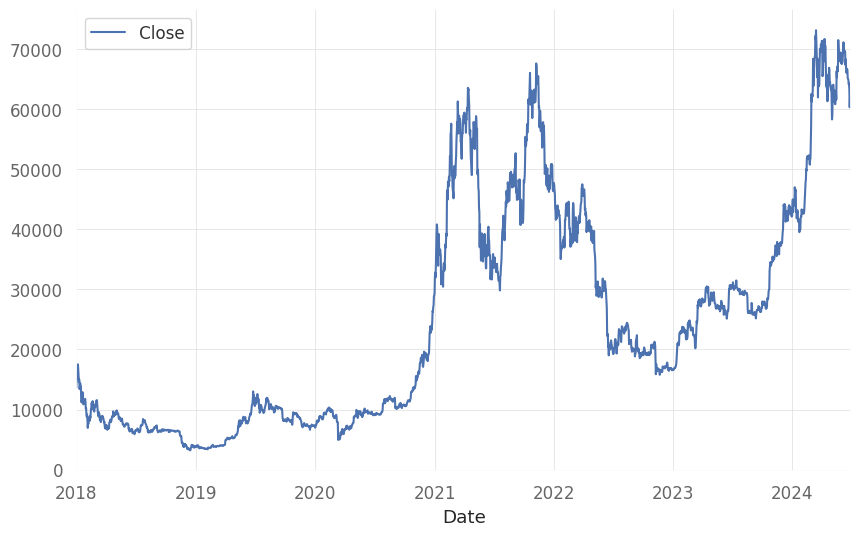

In [5]:
df_btc.plot();

# 3. An√°lise das M√©tricas

Aqui calculamos Sharpe e Sortino ratios considerando uma taxa livre de risco de 5% por semestre usando uma fun√ß√£o rolling da biblioteca quantstats.

In [6]:
sharpe_qs = pd.Series(qs.stats.rolling_sharpe(df_btc['Close'], rf = 0.05).values)
sortino_qs = pd.Series(qs.stats.rolling_sortino(df_btc['Close'], rf = 0.05).values)
sharpe_qs.index = df_btc.index
sortino_qs.index = df_btc.index

Vejamos a correla√ß√£o entre os dois √≠ndices

In [7]:
fig_corr = go.Figure()

fig_corr.add_trace({'type':'scatter',
                    'x': sharpe_qs,
                    'y': sortino_qs,
                    'mode': 'markers',
                    'line':{'color':'blue'}})

fig_corr.update_layout(template='simple_white', paper_bgcolor="#f7f8fa",
                        margin=dict(l=70, r=20, t=20, b=70),
                        xaxis_title='<b>Sharpe', yaxis_title='<b>Sortino',
                        width=500, height=500)

In [8]:
corr, p = stats.pearsonr(sharpe_qs.dropna(), sortino_qs.dropna())
print('Correla√ß√£o de Pearson, r=%.3f' %corr, 'p=%.3f' %p)

Correla√ß√£o de Pearson, r=0.990 p=0.000


Com uma correla√ß√£o t√£o alta, seria poss√≠vel tirar algum insight comparando os dois indicadores de risco?

Uma correla√ß√£o de Pearson de ùëü = 0.990 indica uma correla√ß√£o extremamente alta entre os √≠ndices de Sharpe e Sortino. Isso significa que h√° uma rela√ß√£o linear muito forte e positiva entre esses dois indicadores de risco ajustado ao retorno. Quando a correla√ß√£o √© t√£o alta, isso geralmente sugere que as duas m√©tricas est√£o capturando essencialmente o mesmo aspecto do desempenho ajustado ao risco, pelo menos em termos lineares.

In [9]:
fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x = sharpe_qs.index, y = sharpe_qs,
                         name = 'Sharpe', line = dict(color = 'blue', width = 2)),
              secondary_y = False)

fig.add_trace(go.Scatter(x = sortino_qs.index, y = sortino_qs,
                         name = 'Sortino', line = dict(color = 'red', width = 2)),
              secondary_y = False)

fig.add_trace(go.Scatter(x = df_btc.index, y = np.log(df_btc['Close']),
                         name = 'log price BTC-USD', line = dict(color = 'black', width = 2)),
              secondary_y = True)

fig.update_yaxes(title_text = 'Risk-adjuste values', secondary_y = False)
fig.update_yaxes(title_text = 'log price BTC-USD', secondary_y = True)
fig.update_layout(title='<b>Sharpe vs Sortino ratios', xaxis_title="<b>Data", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=15,color="black"), template = 'simple_white', paper_bgcolor="#f7f8fa",
                  margin=dict(l=75, r=20, t=70, b=70), legend=dict(orientation="h",yanchor="bottom",y=1,xanchor="right",x=0.4),
                  width=1000,height=500)

# 4. Insights a partir da correla√ß√£o:

Consist√™ncia na avalia√ß√£o de risco: A alta correla√ß√£o sugere que, em muitos casos, o desempenho relativo das carteiras ou investimentos ser√° semelhante, independentemente de usar o √≠ndice de Sharpe ou o √≠ndice de Sortino. Isso pode indicar que ambos os √≠ndices oferecem resultados consistentes ao avaliar o equil√≠brio entre retorno e risco.

Enfoque na volatilidade negativa: Apesar da alta correla√ß√£o, o √≠ndice de Sortino se concentra mais na volatilidade negativa (ou risco downside) do que o √≠ndice de Sharpe, que considera a volatilidade total. Se houver diferen√ßas significativas na volatilidade downside entre investimentos ou carteiras, o √≠ndice de Sortino pode ser mais informativo para identificar qual deles melhor protege contra perdas.

A decis√£o sobre qual √≠ndice usar pode depender do objetivo espec√≠fico do investidor:

Se o objetivo √© entender o desempenho ajustado ao risco de maneira abrangente, o √≠ndice de Sharpe pode ser suficiente, dado que ele captura tanto o risco total quanto o retorno.

Se o foco est√° na minimiza√ß√£o de riscos significativos de desvaloriza√ß√£o, especialmente em estrat√©gias conservadoras, o √≠ndice de Sortino pode fornecer uma perspectiva mais relevante.

Valida√ß√£o da estrat√©gia de investimento: A alta correla√ß√£o pode validar a estrat√©gia de usar qualquer um dos √≠ndices para tomar decis√µes de investimento. Se ambos os √≠ndices levarem a conclus√µes semelhantes sobre quais investimentos s√£o prefer√≠veis com base no risco ajustado ao retorno, isso fortalece a confian√ßa na an√°lise realizada.

Em resumo, com uma correla√ß√£o t√£o alta entre os √≠ndices de Sharpe e Sortino, voc√™ pode confiar em qualquer um dos √≠ndices para avaliar o risco ajustado ao retorno, mas considere o contexto espec√≠fico e o objetivo de investimento ao decidir qual √≠ndice utilizar.